In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('vaccination_tweets.csv')
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
data.shape

(4350, 16)

In [4]:
data.size

69600

In [5]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,4.350000e+03,4.350000e+03,4350.000000,4350.000000,4350.000000,4350.000000
mean,1.345223e+18,4.247770e+04,1156.824598,13430.542759,1.817011,10.789655
std,4.512065e+15,3.682254e+05,2728.869207,39579.885819,15.981985,74.747403
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.341104e+18,1.112500e+02,165.000000,390.000000,0.000000,0.000000
50%,1.345683e+18,4.795000e+02,459.000000,1943.000000,0.000000,1.000000
75%,1.349097e+18,2.202250e+03,1204.750000,9884.000000,1.000000,5.000000
max,1.352933e+18,1.371493e+07,99180.000000,924667.000000,678.000000,2258.000000


In [6]:
data=data.drop(columns=['id','user_created','date','is_retweet'],axis=1)

In [7]:
data.shape

(4350, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         4350 non-null   object
 1   user_location     3458 non-null   object
 2   user_description  4077 non-null   object
 3   user_followers    4350 non-null   int64 
 4   user_friends      4350 non-null   int64 
 5   user_favourites   4350 non-null   int64 
 6   user_verified     4350 non-null   bool  
 7   text              4350 non-null   object
 8   hashtags          3240 non-null   object
 9   source            4349 non-null   object
 10  retweets          4350 non-null   int64 
 11  favorites         4350 non-null   int64 
dtypes: bool(1), int64(5), object(6)
memory usage: 378.2+ KB


In [9]:
data.isnull().sum()

user_name              0
user_location        892
user_description     273
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
text                   0
hashtags            1110
source                 1
retweets               0
favorites              0
dtype: int64

In [10]:
data.dropna(inplace=True)
data.isnull().sum()

user_name           0
user_location       0
user_description    0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
text                0
hashtags            0
source              0
retweets            0
favorites           0
dtype: int64

In [11]:
data['user_location'].value_counts()

India                   42
London, England         41
United Arab Emirates    39
Malaysia                34
Türkiye                 29
                        ..
ᏕԾuϮ♅ ᕱꊰᏒᎥ꒝ᕱ             1
Australia                1
Malaysia & Indonesia     1
South Kingstown, RI      1
Saranac Lake, NY         1
Name: user_location, Length: 1134, dtype: int64

In [12]:
data['user_verified'].value_counts()

False    2155
True      347
Name: user_verified, dtype: int64

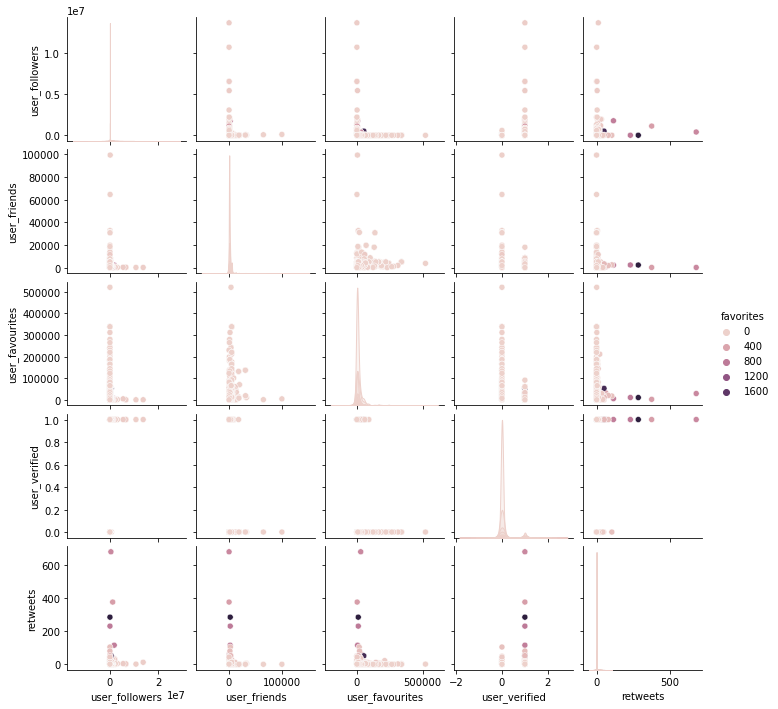

In [13]:
sns.pairplot(data,hue='favorites',size=2)

In [14]:

corr = data.corr()
corr['favorites'].sort_values(ascending = False)

favorites          1.000000
retweets           0.568812
user_verified      0.139019
user_followers     0.060918
user_favourites    0.003965
user_friends      -0.002414
Name: favorites, dtype: float64

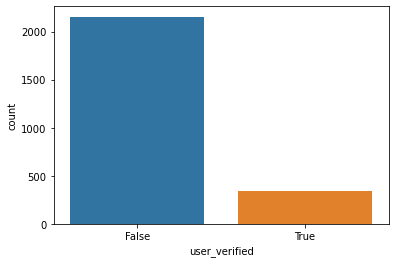

In [15]:
sns.countplot(data['user_verified'])
plt.show()

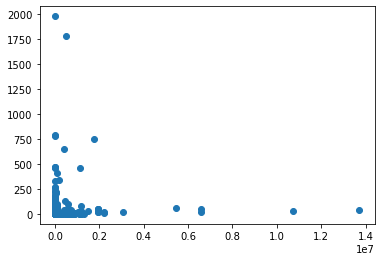

In [16]:
plt.scatter(data['user_followers'],data['favorites'])

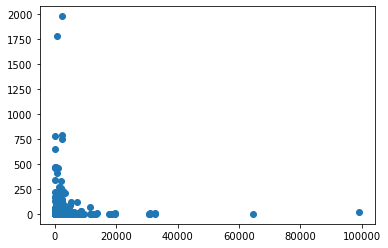

In [17]:
plt.scatter(data['user_friends'],data['favorites'])

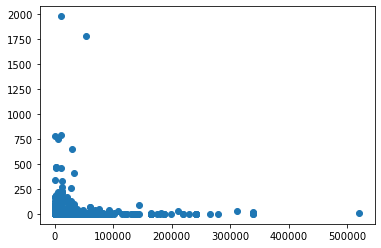

In [18]:
plt.scatter(data['user_favourites'],data['favorites'])

<AxesSubplot:>

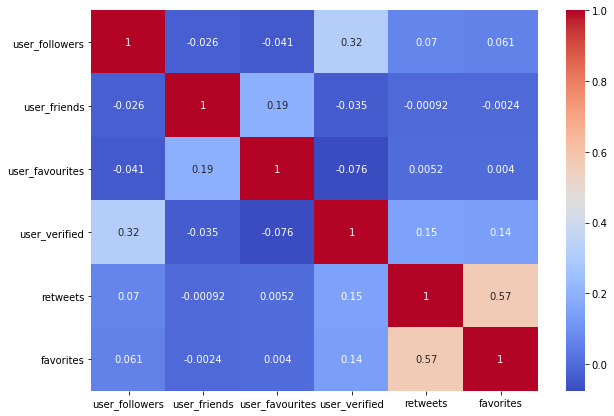

In [19]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [20]:
data=data.drop(columns=['user_verified'],axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [22]:
data.head()

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,text,hashtags,source,retweets,favorites
0,1152,501,151,405,1692,3247,1909,945,23,0,0
2,1593,1061,1606,10,88,155,403,1213,23,0,0
6,552,78,496,2731,5001,69344,2450,1415,22,0,4
9,242,443,37,671,2368,20469,108,339,22,0,0
10,1387,974,743,1302,78,339,2463,857,22,0,0


In [23]:
x = data.drop(columns=['favorites'])
y = data['favorites']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [25]:
x_train.shape

(1751, 10)

In [26]:
x_test.shape

(751, 10)

In [27]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.38748335552596536

In [28]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,4,7
favorites,,,,,
0,284,5,3,2,0
1,107,3,5,2,1
2,60,1,2,0,4
3,45,1,0,1,1
4,25,0,1,0,1
...,...,...,...,...,...
140,1,0,0,0,0
178,1,0,0,0,0
463,0,0,0,0,1


In [29]:
confusion_matrix(y_test,y_predict)

array([[284,   5,   3, ...,   0,   0,   0],
       [107,   3,   5, ...,   0,   0,   0],
       [ 60,   1,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.97      0.59       294
           1       0.19      0.03      0.04       118
           2       0.10      0.03      0.05        67
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        10
           7       0.06      0.11      0.07        19
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00    

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.2729693741677763

In [32]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,...,114,116,132,133,151,170,194,215,262,471
favorites,,,,,,,,,,,,,,,,,,,,,
0,165,52,19,15,9,5,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,43,25,12,9,8,4,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,26,10,6,6,2,3,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
3,9,10,3,5,3,1,3,1,1,3,...,0,0,0,0,0,0,0,0,0,0
4,7,2,7,2,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
confusion_matrix(y_test,y_predict)

array([[165,  52,  19, ...,   0,   0,   0],
       [ 43,  25,  12, ...,   0,   0,   0],
       [ 26,  10,   6, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58       294
           1       0.20      0.21      0.21       118
           2       0.10      0.09      0.09        67
           3       0.10      0.10      0.10        48
           4       0.03      0.04      0.04        27
           5       0.05      0.05      0.05        20
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        19
           8       0.20      0.06      0.10        16
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.12      1.00      0.22         1
          17       0.00    

In [35]:
model = RandomForestClassifier(random_state=10,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.3914780292942743

In [36]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,...,42,44,53,55,57,84,114,116,133,215
favorites,,,,,,,,,,,,,,,,,,,,,
0,260,26,2,2,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,83,23,3,5,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,14,6,5,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,17,5,3,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,6,2,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
confusion_matrix(y_test,y_predict)

array([[260,  26,   2, ...,   0,   0,   0],
       [ 83,  23,   3, ...,   0,   0,   0],
       [ 38,  14,   6, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.55      0.88      0.68       294
           1       0.20      0.19      0.20       118
           2       0.19      0.09      0.12        67
           3       0.09      0.06      0.07        48
           4       0.08      0.04      0.05        27
           5       0.11      0.05      0.07        20
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00    

In [39]:
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.13315579227696406

In [40]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,...,85,96,114,116,132,169,170,214,231,1979
favorites,,,,,,,,,,,,,,,,,,,,,
0,47,90,22,45,1,46,7,1,1,5,...,1,1,1,0,0,0,1,2,0,1
1,14,33,15,16,1,20,6,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,6,11,12,15,0,13,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3,7,12,3,6,0,13,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,4,4,3,0,8,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
178,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
confusion_matrix(y_test,y_predict)

array([[47, 90, 22, ...,  0,  0,  1],
       [14, 33, 15, ...,  0,  0,  0],
       [ 6, 11, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.53      0.16      0.25       294
           1       0.17      0.28      0.21       118
           2       0.11      0.18      0.14        67
           3       0.06      0.12      0.08        48
           4       0.00      0.00      0.00        27
           5       0.01      0.10      0.03        20
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00    

In [43]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([ 0,  3,  0,  5,  0,  0,  0,  2,  0,  0,  0,  5,  1,  0,  3,  0,  0,
        1,  0,  0,  0,  3,  0,  0,  0,  6,  5,  1,  0,  0,  2,  0, 13,  2,
        0,  0,  0,  2,  3,  0,  0,  0, 21,  6,  1,  0,  0,  0,  0,  0,  0,
        0, 12,  4,  0,  0,  0, 10,  0,  0,  0,  0,  5,  4,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  1,  0,  1,  6,  0,  0,  0,  0,  0,  0,  1, 11,
        0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  3,  0,  6,  0,  0,  0,
        2,  0,  2,  1,  1,  0,  1,  1,  2,  1,  0,  0,  0,  0,  3,  0,  0,
        0,  0,  0,  0,  0,  3,  1,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  1,  1,  0, 12,  0, 33,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0, 12,  0,
        2,  0,  3,  0,  1,  6, 21,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,
        0, 23,  0,  1,  0,  0,  0,  0,  1,  0,  2,  1,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  5,  2,  0,  2,  1,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  0,  5,  0

In [44]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.3488681757656458


In [45]:
confusion_matrix(y_test,y_predict)

array([[228,  38,  14, ...,   0,   0,   0],
       [ 76,  21,   8, ...,   0,   0,   0],
       [ 43,   7,   5, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [46]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,9,10,11,12,13,20,21,23,24,26,33
favorites,,,,,,,,,,,,,,,,,,,
0,228,38,14,2,6,0,4,0,0,2,0,0,0,0,0,0,0,0,0
1,76,21,8,5,2,2,1,1,0,1,0,0,0,0,0,0,1,0,0
2,43,7,5,7,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,23,13,4,4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4,13,5,3,1,0,2,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
463,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
y_predict = model.predict(x_test)

In [48]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[228  38  14 ...   0   0   0]
 [ 76  21   8 ...   0   0   0]
 [ 43   7   5 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


<AxesSubplot:>

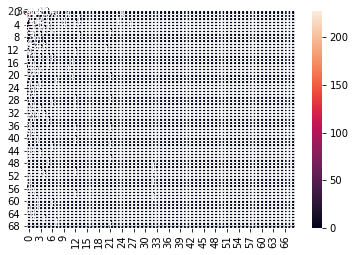

In [49]:
sns.heatmap(matrix,annot=True)

In [50]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.3488681757656458


In [51]:
pd.crosstab(y_test,y_predict)


col_0,0,1,2,3,4,5,6,7,9,10,11,12,13,20,21,23,24,26,33
favorites,,,,,,,,,,,,,,,,,,,
0,228,38,14,2,6,0,4,0,0,2,0,0,0,0,0,0,0,0,0
1,76,21,8,5,2,2,1,1,0,1,0,0,0,0,0,0,1,0,0
2,43,7,5,7,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,23,13,4,4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4,13,5,3,1,0,2,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
463,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.38348868175765644

In [53]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9,...,42,50,53,55,58,80,84,132,133,169
favorites,,,,,,,,,,,,,,,,,,,,,
0,251,31,5,3,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,22,3,6,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,10,6,4,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,15,8,4,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,6,2,2,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.39014647137150466

In [55]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 294, 1: 118, 2: 67, 3: 48, 4: 27, 5: 20, 7: 19, 8: 16, 11: 12, 6: 10, 18: 8, 13: 8, 9: 7, 10: 6, 17: 5, 12: 5, 34: 5, 22: 4, 15: 4, 20: 4, 28: 3, 26: 3, 38: 2, 30: 2, 21: 2, 24: 2, 31: 2, 44: 2, 25: 2, 23: 2, 47: 2, 14: 2, 19: 2, 62: 2, 29: 1, 126: 1, 37: 1, 51: 1, 60: 1, 100: 1, 40: 1, 36: 1, 43: 1, 41: 1, 35: 1, 58: 1, 16: 1, 134: 1, 750: 1, 69: 1, 81: 1, 48: 1, 70: 1, 94: 1, 654: 1, 136: 1, 89: 1, 27: 1, 178: 1, 45: 1, 63: 1, 46: 1, 54: 1, 140: 1, 99: 1, 463: 1, 56: 1, 127: 1})


col_0,0,1,2,3,5
favorites,,,,,
0,292,1,1,0,0
1,115,0,2,0,1
2,62,0,1,2,2
3,46,2,0,0,0
4,25,0,0,1,1
...,...,...,...,...,...
140,1,0,0,0,0
178,1,0,0,0,0
463,1,0,0,0,0


In [56]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [57]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.38748335552596536,
 'Random Forest': 0.38748335552596536,
 'DecisionTree': 0.2596537949400799,
 'KNN': 0.3488681757656458,
 'MPL': 0.22503328894806923,
 'XGB': 0.36617842876165113,
 'SVM': 0.39280958721704395}

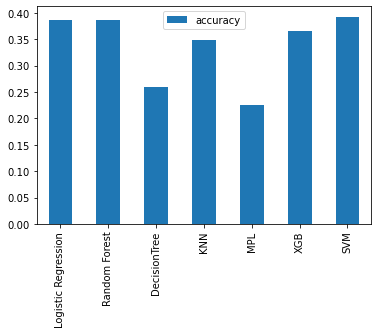

In [58]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();